### Медицинские расходы

**Цель:** построить модели для прогнозирования **медицинских расходов** (```"charges"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.



In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import os

In [142]:
print(os.listdir())

['.ipynb_checkpoints', 'data_description.txt', 'main.ipynb', 'test.csv', 'train.csv']


In [143]:
train_data = pd.read_csv('train.csv')
train_data

,age,sex,bmi,children,smoker,region,charges
0,34,male,42.900,1,no,southwest,4536.25900
1,61,female,36.385,1,yes,northeast,48517.56315
2,60,male,25.740,0,no,southeast,12142.57860
3,44,female,29.810,2,no,southeast,8219.20390
4,40,female,29.600,0,no,southwest,5910.94400
...,...,...,...,...,...,...,...
1200,44,female,27.500,1,no,southwest,7626.99300
1201,37,female,17.290,2,no,northeast,6877.98010
1202,21,female,25.800,0,no,southwest,2007.94500
1203,30,male,38.830,1,no,southeast,18963.17192


In [144]:
test_data = pd.read_csv('test.csv')
test_data

,age,sex,bmi,children,smoker,region,charges
0,57,female,31.160,0,yes,northwest,43578.93940
1,61,female,39.100,2,no,southwest,14235.07200
2,61,male,23.655,0,no,northeast,13129.60345
3,59,male,29.700,2,no,southeast,12925.88600
4,19,female,28.880,0,yes,northwest,17748.50620
...,...,...,...,...,...,...,...
128,56,male,40.300,0,no,southwest,10602.38500
129,61,female,22.040,0,no,northeast,13616.35860
130,49,female,42.680,2,no,southeast,9800.88820
131,43,male,27.360,3,no,northeast,8606.21740


In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1205 non-null   int64  
 1   sex       1205 non-null   object 
 2   bmi       1205 non-null   float64
 3   children  1205 non-null   int64  
 4   smoker    1205 non-null   object 
 5   region    1205 non-null   object 
 6   charges   1205 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.0+ KB


In [146]:
train_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [147]:
train_data['charges'].describe()

count     1205.000000
mean     13135.971538
std      12029.499221
min       1121.873900
25%       4670.640000
50%       9283.562000
75%      16577.779500
max      63770.428010
Name: charges, dtype: float64

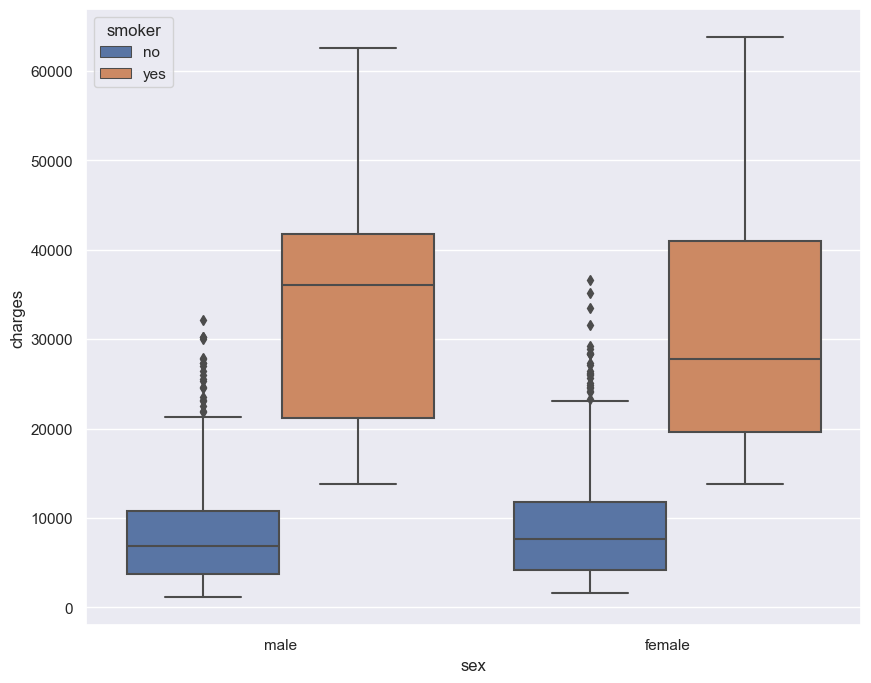

In [148]:
fig = plt.figure(figsize=(10,8))
fig = sns.boxplot(data=train_data, x="sex", y="charges", hue='smoker')
fig = sns.set_style("darkgrid")

Анализ:
Из графика boxplot можно сделать выводы, что у женщин и мужчин которые не курят медиана по расходам в района 7000-8000. У мужчин которые курят медиана по расходам возрастает в разы и составляет примерно 37000, у женщин расхлды тоже возрастают и медиана составляет в районе 28000.

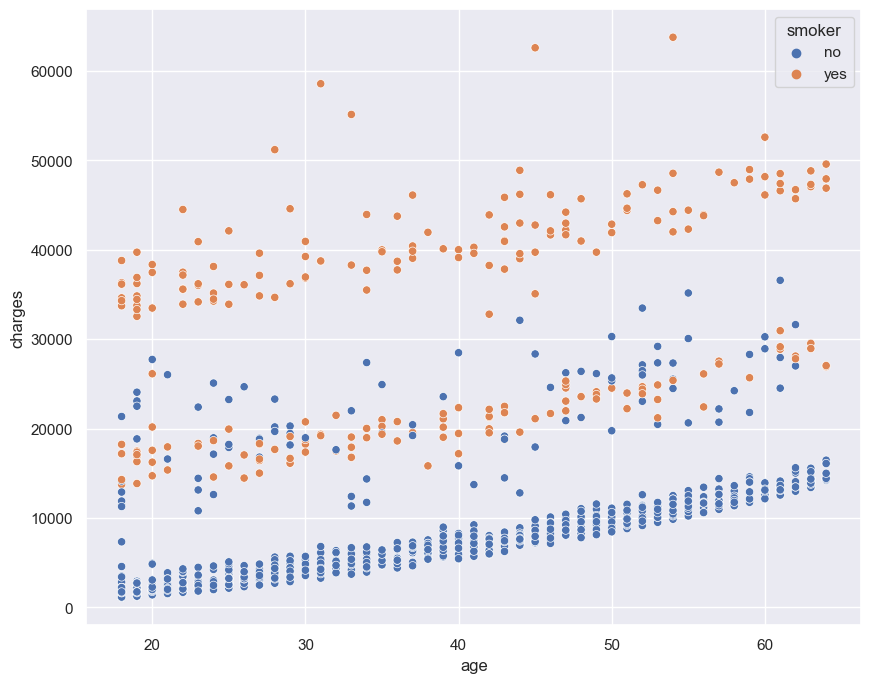

In [149]:
fig = plt.figure(figsize=(10,8))
fig  = sns.scatterplot(data=train_data, x="age", y="charges", hue="smoker")
fig = sns.set_style("whitegrid")

Анализ:
Видно естественное распределение того что с возрастом возрастают медицинские расходы, также данные поделились на 3 группы.
1 группа это люди которые не курят и их рассходы намного меньше чем у 2 и 3 группы.
2 группа это курящие и не курящие. Возмножно такое что у человека проблемы со здоровьем и его расходы возрастают и также люди у которых расходы возрастают из за проблем со здоровьем связанных с курением.
3 группа люди у которые имеют проблемы со здоровьем и возможно здоровье ухудшилось из за курения. 

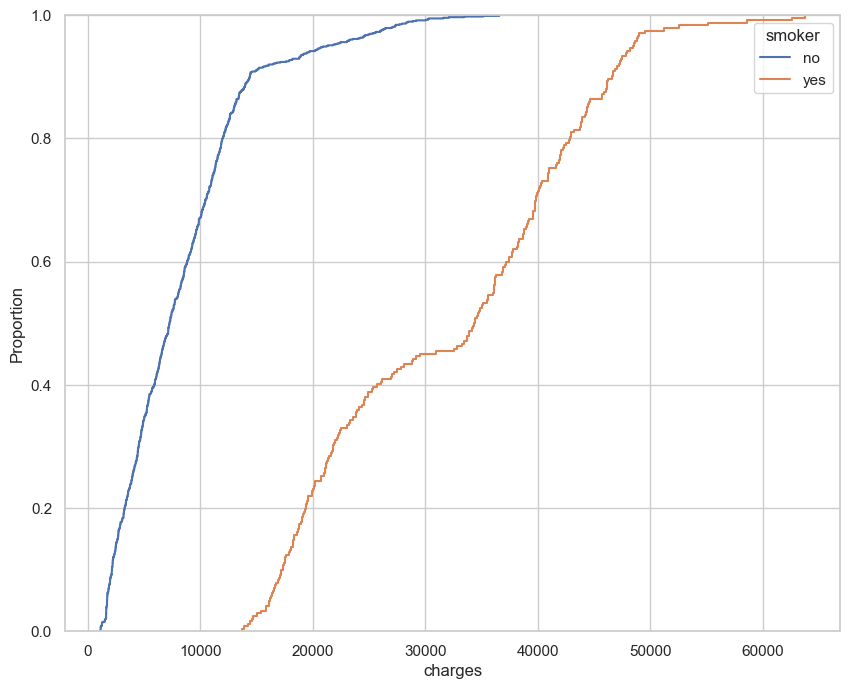

In [150]:
fig = plt.figure(figsize=(10,8))
fig = sns.ecdfplot(data=train_data, x="charges", hue="smoker")
fig = sns.set_style("whitegrid")

Анализ:
У 90% людей которые не курят, их медецинские расходы не превышают 10000.
Курильщики имеют другую ситуацию, их расходы выше, у 50% людей расходы составляют выше 30000.

In [151]:
# Трансформирование номинативных данных
columns_encoded = ['sex','smoker','region']
encoded_data_train = pd.get_dummies(train_data, columns= columns_encoded)
encoded_data_test = pd.get_dummies(test_data, columns= columns_encoded)
encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,34,42.900,1,4536.25900,0,1,1,0,0,0,0,1
1,61,36.385,1,48517.56315,1,0,0,1,1,0,0,0
2,60,25.740,0,12142.57860,0,1,1,0,0,0,1,0
3,44,29.810,2,8219.20390,1,0,1,0,0,0,1,0
4,40,29.600,0,5910.94400,1,0,1,0,0,0,0,1


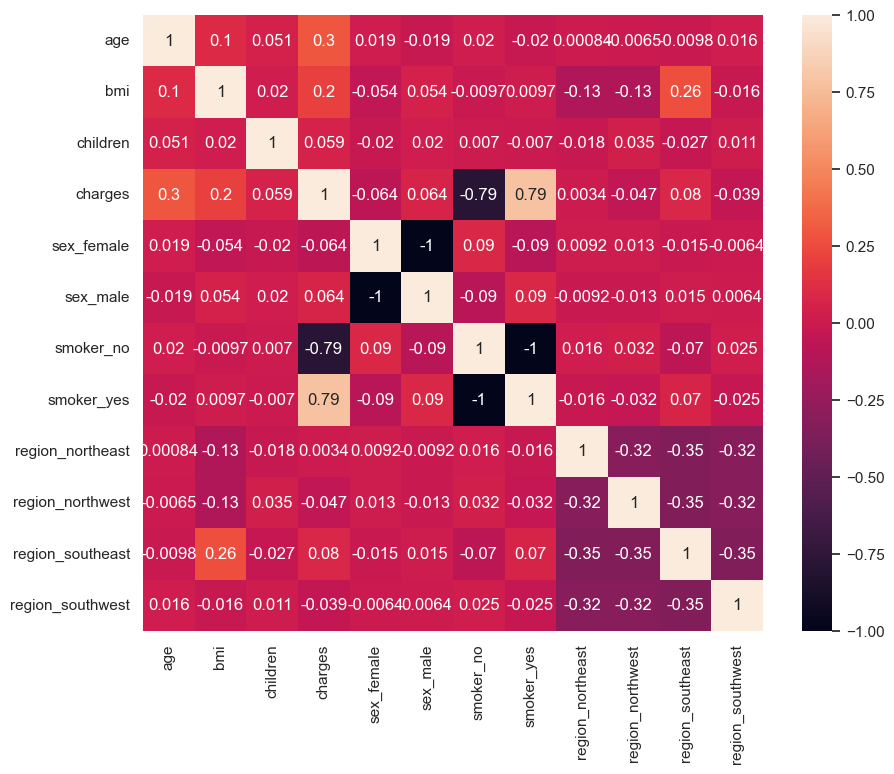

In [152]:
# Матрица корриляции
encoded_data.corr()
fig = plt.figure(figsize=(10,8))
fig = sns.heatmap(encoded_data.corr(),annot=True)

Анализ:
Наблюдается высокая корреляция между charges и smoker_no(отрицательная корреляция), smoker_yes(положительная корреляция)

In [153]:
# Линейная регрессия
regressor = LinearRegression()
regressor.fit(encoded_data['age'].values.reshape(-1,1), encoded_data['charges'].values.reshape(-1,1))
preds = regressor.predict(encoded_data_test['age'].values.reshape(-1,1))

mse = mean_squared_error(encoded_data_test['charges'].values.reshape(-1,1),preds)
rmse = np.sqrt(mean_squared_error(encoded_data_test['charges'].values.reshape(-1,1),preds))
r2 = np.abs(r2_score(encoded_data_test['charges'].values.reshape(-1,1),preds))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MSE: 147562103.4971665
RMSE: 12147.514292939379
R2: 0.09247669860683716


Значения R2 близко к нулю, предсказания слишком сильно расходяться. Для улучшения требуется добавить независимые переменные которые коррелируют с зависимой переменной.

In [154]:
# Множественная линейная регрессия
X_train, Y_train = encoded_data[['age', 'bmi', 'smoker_no', 'smoker_yes']], encoded_data_train['charges']
X_test, Y_test = encoded_data_test[['age', 'bmi', 'smoker_no', 'smoker_yes']], encoded_data_test['charges']

In [155]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
preds = regressor.predict(X_test)

mse = mean_squared_error(Y_test,preds)
rmse = np.sqrt(mean_squared_error(Y_test,preds))
r2 = np.abs(r2_score(Y_test,preds))

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')


MSE: 35286312.85633658
RMSE: 5940.2283505212645
R2: 0.782985262622056


In [156]:
df_encoded_model2 = sm.OLS(Y_train, X_train).fit() 
df_encoded_model2.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.742     
Dependent Variable:   charges           AIC:                 24433.0887
Date:                 2023-04-08 15:46  BIC:                 24453.4657
No. Observations:     1205              Log-Likelihood:      -12213.   
Df Model:             3                 F-statistic:         1156.     
Df Residuals:         1201              Prob (F-statistic):  0.00      
R-squared:            0.743             Scale:               3.7327e+07
-----------------------------------------------------------------------
              Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
-----------------------------------------------------------------------
age           255.2669   12.7304  20.0517 0.0000    230.2906   280.2433
bmi           328.9320   28.9066  11.3791 0.0000    272.2189   385.6451
smoker_no  -11650.3086  991.0390 -11.7557 0.0000 -13594.6688 -9705.9484
smoker_yes  12064.2846 1047.7836  11.5141 0.0000  10008.5949 14119.9743
-----------------------------------------------------------------------
Omnibus:                264.773        Durbin-Watson:           2.014  
Prob(Omnibus):          0.000          Jarque-Bera (JB):        604.258
Skew:                   1.202          Prob(JB):                0.000  
Kurtosis:               5.500          Condition No.:           408    
=======================================================================

"""

Значения p_values меньше 0.05 а это значит что значения статистически значимы

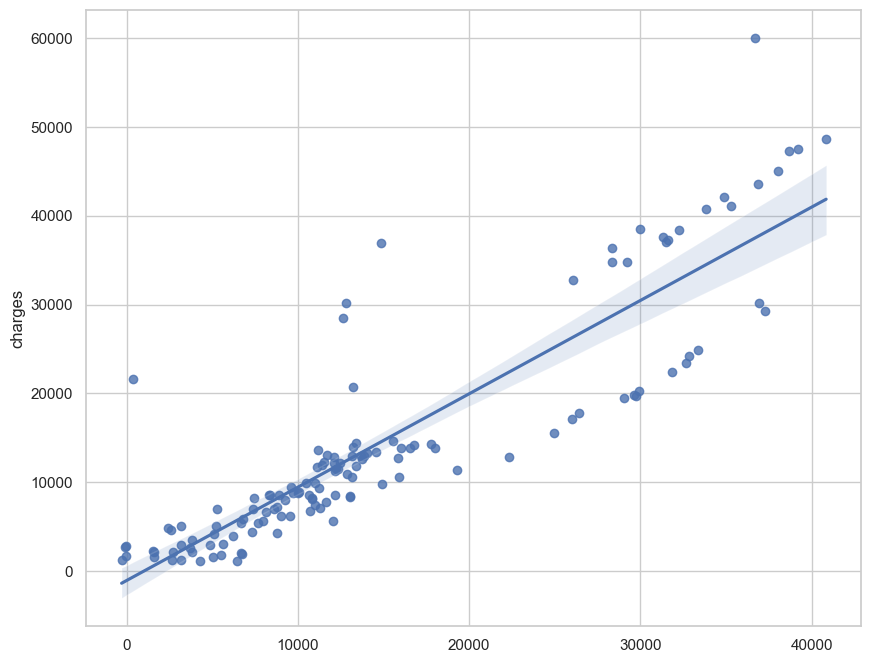

In [157]:
fig = plt.figure(figsize=(10,8))
fig = sns.regplot(x=preds, y=Y_test)


Предсказания имеют линейный характер, естественно присутствуют небольшие отклонения. Скорее всего они связаны со значениями выбросов которые имеются у некурящих людей, так как некурящий человек логически может иметь большие медецинские расходы из за каких то серьезных болезней

Заключение:
    Была построена модель множественной линейной регрессии с показателем R2 0.78, Основная из причина увеличения медецинских расходов является курение, этот показатель имеет сильную корреляцию.У некурящих людей медицинские расходы почти в 2 раза меньше чем у курильщиков.